In [3]:
import matplotlib.pyplot as plt
import numpy as np
import functools
from scipy import interpolate

In [18]:
x = np.arange(1100, 2000, 100, np.int16 )
print(x)
y = np.array([1100,1150,1200,1250,1400,1600,1700,1800, 1900])

[1100 1200 1300 1400 1500 1600 1700 1800 1900]


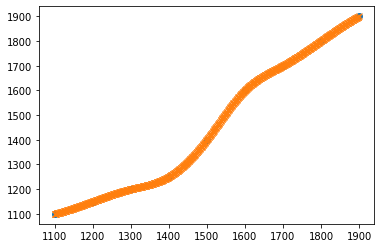

In [22]:
splines =interpolate.splrep(x, y)

x_vals = np.arange(1100,1900,1,np.int16)
y_vals =interpolate.splev(x_vals, splines)

plt.plot(x, y, 'o') 
plt.plot(x_vals, y_vals, '-x')
plt.show()

# RC Utils
## Utils functions

- linear interpolate
    - create util function using functools.partial
- expo
- throttle_curve
- constrain_value
- mapping using regression

In [ ]:
## linear interpolate

In [59]:
def linear_interpolate(var_value,
    low_output=1100, high_output=1900,
    var_low=1100, var_high=1900):

    if var_value <= var_low:
        return low_output

    if var_value >= var_high:
        return high_output

    p = (var_value - var_low) / (var_high - var_low)
    return low_output + p * (high_output - low_output)

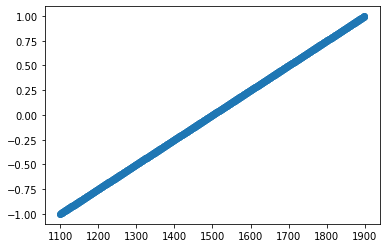

In [65]:
mymap = functools.partial(linear_interpolate, low_output=-1, high_output=1,
    var_low=1100, var_high=1900)
x = np.arange(1100,1900,1,np.int16)
myline = np.array(list(map(mymap, x)))

plt.scatter(x, myline)
plt.show()

# Expo curve

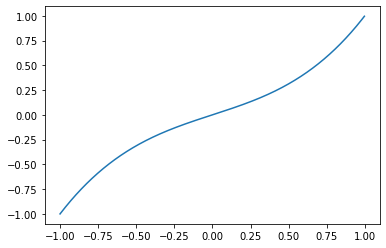

In [61]:
def expo(x, alfa=0.5):
    return (1.0-alfa)*x+alfa*x*x*x
    
# myline = np.linspace(-1, 1, 100)
y = np.array(list(map(expo, myline)))

plt.plot(myline, y)
plt.show()


# throttle_curve

In [63]:
def constrain_value(my_value, min_value, max_value):
    return max(min(my_value, max_value), min_value)


def throttle_curve(thr_mid, alpha, thr_in):
    """
    throttle curve generator
    * thr_mid: output at mid stick
    * alpha: expo coefficienta
    * thr_in: [0-1]
    """
    alpha2 = alpha + 1.25 * (1.0 - alpha) * (0.5 - thr_mid) / 0.5
    alpha2 = constrain_value(alpha2, 0.0, 1.0)
    thr_out = 0.0
    if thr_in > 0.5:
        t = linear_interpolate(thr_in, -1.0, 0.0, 0.0, 0.5)
        thr_out = linear_interpolate(expo(t, alpha2),
            0.0, thr_mid,
            -1.0, 0.0)
    else:
        t = linear_interpolate(thr_in, 0.0, 1.0, 0.5, 1.0)
        thr_out = linear_interpolate(expo(t, alpha2),
            thr_mid , 1.0, 
            -1.0, 0.0)
    return thr_out

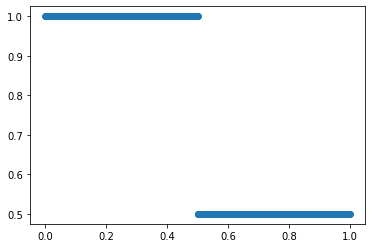

In [64]:
map_range = functools.partial(linear_interpolate,
        low_output=0, 
        high_output=1,
        var_low=1100, 
        var_high=1900)
f = functools.partial(throttle_curve, 0.5, 0.5)
x = np.arange(1100, 1900, 1, np.int16 )
x = np.array(list(map(map_range, x)))
y = np.array(list(map(f, x)))
plt.scatter(x,y)
plt.show()